# Descriptive Analyses

Intro tables to give context to the data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid",{'axes.spines.left' : False,
                           'axes.spines.right': False,
                           'axes.spines.top': False,
                           'grid.linestyle': ':'})
sns.set_context("poster")

STUDY_ID ="60b37265a9f60881975de69e"


In [5]:
participants = pd.read_csv(f"../data/processed/{STUDY_ID}-participants.csv")
print("Shape: {}x{}".format(*participants.shape))
posts = pd.read_csv(f"../data/processed/{STUDY_ID}-rumour-results.csv")
reshare_rates = pd.read_csv(f"../data/processed/{STUDY_ID}-reshare_rates.csv")
post_study = pd.read_csv(f"../data/processed/{STUDY_ID}-post-study-responses.csv")
print("Shape: {}x{}".format(*reshare_rates.shape))

Shape: 107x36
Shape: 202x43


In [6]:
treat = posts[["user_id","condition"]].set_index("user_id")["condition"].to_dict()
participants["condition"] = participants["user_id"].map(treat)
print("Shape: {}x{}".format(*participants.shape))

Shape: 107x37


## Initial Tables

1. Participant statistics
2. Experiment descriptive statistics

### Participant statistics

> Comparison of groups by baseline demographics.

In [7]:
from tableone import TableOne
categorical = ["educationLevel","politicalAffiliation","attendsProtests"] + [col for col in participants.columns if "gender" in col or "socialMedias" in col or "affiliatedMovements" in col]

table_one = TableOne(participants.reset_index().drop(["index","user_id","timeSubmitted","consent"],
                                                     axis=1),
                                                     categorical = categorical,
                     groupby=["condition"])
table_one.head(40)

Grouped by condition  \
                                                                    Missing   
n                                                                             
educationLevel, n (%)                 communityCollege                    0   
                                      doctorate                               
                                      graduateSchool                          
                                      highSchool                              
                                      none                                    
                                      undergrad                               
politicalAffiliation, n (%)           centre                              0   
                                      centreLeft                              
                                      centreRight                             
                                      left                                    
                                      none                                    
                                      right                                   
attendsProtests, n (%)                False                               7   
                                      True                                    
age, mean (SD)                                                            0   
gender_man, n (%)                     0                                   0   
                                      1                                       
gender_nonBinary, n (%)               0                                   0   
                                      1                                       
gender_woman, n (%)                   0                                   0   
                                      1                                       
affiliatedMovements_climate, n (%)    0                                   0   
                                      1                                       
affiliatedMovements_freeSpeech, n (%) 0                                   0   
                                      1                                       
affiliatedMovements_gender, n (%)     0                                   0   
                                      1                                       
affiliatedMovements_indigenous, n (%) 0                                   0   
                                      1                                       
affiliatedMovements_labour, n (%)     0                                   0   
                                      1                                       
affiliatedMovements_lgbtqa, n (%)     0                                   0   
                                      1                                       
affiliatedMovements_none, n (%)       0                                   0   
                                      1                                       
affiliatedMovements_race, n (%)       0                                   0   
                                      1                                       
affiliatedMovements_religion, n (%)   0                                   0   
                                      1                                       

                                                                     \
                                                            Overall   
n                                                               107   
educationLevel, n (%)                 communityCollege    15 (14.0)   
                                      doctorate             2 (1.9)   
                                      graduateSchool      15 (14.0)   
                                      highSchool          23 (21.5)   
                                      none                  1 (0.9)   
                                      undergrad           51 (47.7)   
politicalAffiliation, n (%)           centre              14 (13.1)   
                          

In [8]:
table_one.tail(45)

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grouped by condition               \
                                                     Missing      Overall   
affiliatedMovements_freeSpeech, n (%) 0                    0    37 (34.6)   
                                      1                         70 (65.4)   
affiliatedMovements_gender, n (%)     0                    0    26 (24.3)   
                                      1                         81 (75.7)   
affiliatedMovements_indigenous, n (%) 0                    0    48 (44.9)   
                                      1                         59 (55.1)   
affiliatedMovements_labour, n (%)     0                    0    50 (46.7)   
                                      1                         57 (53.3)   
affiliatedMovements_lgbtqa, n (%)     0                    0    42 (39.3)   
                                      1                         65 (60.7)   
affiliatedMovements_none, n (%)       0                    0   105 (98.1)   
                                      1                           2 (1.9)   
affiliatedMovements_race, n (%)       0                    0    16 (15.0)   
                                      1                         91 (85.0)   
affiliatedMovements_religion, n (%)   0                    0    64 (59.8)   
                                      1                         43 (40.2)   
affiliatedMovements_smallGov, n (%)   0                    0    84 (78.5)   
                                      1                         23 (21.5)   
socialMedias_ WhatsApp, n (%)         0                    0   106 (99.1)   
                                      1                           1 (0.9)   
socialMedias_Clubhouse, n (%)         0                    0   106 (99.1)   
                                      1                           1 (0.9)   
socialMedias_Discord, n (%)           0                    0  107 (100.0)   
socialMedias_Linkedin, n (%)          0                    0  107 (100.0)   
socialMedias_None, n (%)              0                    0  107 (100.0)   
socialMedias_Telegram, n (%)          0                    0   106 (99.1)   
                                      1                           1 (0.9)   
socialMedias_Tumblr, n (%)            0                    0   106 (99.1)   
                                      1                           1 (0.9)   
socialMedias_Whatsapp, n (%)          0                    0  107 (100.0)   
socialMedias_facebook, n (%)          0                    0    25 (23.4)   
                                      1                         82 (76.6)   
socialMedias_instagram, n (%)         0                    0    20 (18.7)   
                                      1                         87 (81.3)   
socialMedias_reddit, n (%)            0                    0    31 (29.0)   
                                      1                         76 (71.0)   
socialMedias_snapchat, n (%)          0                    0    67 (62.6)   
                                      1                         40 (37.4)   
socialMedias_tiktok, n (%)            0                    0    65 (60.7)   
                                      1                         42 (39.3)   
socialMedias_tumblr, n (%)            0                    0  107 (100.0)   
socialMedias_twitter, n (%)           0                    0    48 (44.9)   
                                      1                         59 (55.1)   
affiliatedMovements_other, n (%)      0                    0   104 (97.2)   
                                      1                           3 (2.8)   

                                                                 
                                            control   treatment  
affiliatedMovements_freeSpeech, n (%) 0   18 (33.3)   19 (35.8)  
                                      1   36 (66.7)   34 (64.2)  
affiliatedMovements_gender, n (%)     0   13 (24.1)   13 (24.5)  
                                      1   41 (75.9)   40 (75.5)  
affiliatedMovements_indi

### Experiment descriptive statistics

In [9]:
table_two = TableOne(posts.drop(["user_id","timeSubmitted","rumour","evidence","code","posterId","id","clickedWarning","warning"],
                                              axis=1),
                     groupby=["condition"],
                     pval=True)
table_two

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grouped by condition                                                  
                                            Missing       Overall       control     treatment P-Value
n                                                            5992          3024          2968        
secondsTaken, mean (SD)                           0  105.0 (23.9)  102.2 (24.7)  107.9 (22.7)  <0.001
reshared, n (%)         False                     0   4876 (81.4)   2489 (82.3)   2387 (80.4)   0.066
                        True                          1116 (18.6)    535 (17.7)    581 (19.6)        
timestamp, mean (SD)                              0   30.0 (17.0)   30.1 (17.1)   29.9 (17.0)   0.567
posterGender, n (%)     female                    0   2999 (50.1)   1481 (49.0)   1518 (51.1)   0.098
                        male                          2993 (49.9)   1543 (51.0)   1450 (48.9)        
misleading, n (%)       False                     0   3852 (64.3)   1944 (64.3)   1908 (64.3)   1.000
                        True                          2140 (35.7)   1080 (35.7)   1060 (35.7)        
warned, n (%)           False                     0   5144 (85.8)  3024 (100.0)   2120 (71.4)  <0.001
                        True                           848 (14.2)                  848 (28.6)        
untagged, n (%)         False                     0   3872 (64.6)  3024 (100.0)    848 (28.6)  <0.001
                        True                          2120 (35.4)                 2120 (71.4)

In [7]:
table_three = pd.pivot_table(reshare_rates,index="evidence",columns="condition",values="Affirms")
table_three

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition,Control,Treatment
evidence,,
High,0.17600,0.185106
Low,0.15283,0.136538


In [8]:
table_four = pd.pivot_table(reshare_rates,index="evidence",columns="condition",values="Denies")
table_four

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition,Control,Treatment
evidence,,
High,0.082000,0.114894
Low,0.284906,0.350000


In [9]:
table_five = reshare_rates.groupby(["condition","evidence"])[["Affirms",
                                                 "Denies",
                                                 ]].mean().T
table_five


/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition Control           Treatment          
evidence     High       Low      High       Low
Affirms     0.176  0.152830  0.185106  0.136538
Denies      0.082  0.284906  0.114894  0.350000

In [10]:
table_six = reshare_rates.groupby(["condition","evidence"])[["Affirms",
                                                 "Denies",
                                                 ]].std().T
table_six

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition   Control           Treatment          
evidence       High       Low      High       Low
Affirms    0.189047  0.192757  0.198887  0.179355
Denies     0.124031  0.219612  0.156008  0.250881

### Other Basic Questions

1. How frequently do users click on the warning?

#### How frequently do users click on the warning?

In [11]:
treat = posts[(posts["condition"]=='treatment') & posts["warning"]].reset_index()
num_treat = len(treat["user_id"].unique())
clicked_warning = treat[treat["clickedWarning"]]
num_clicked = len(clicked_warning["user_id"].unique())
print(f"{100*(num_clicked/num_treat):.2f}% ({num_clicked}/{num_treat}) of participants in the treatment condition clicked a warning")


22.22% (12/54) of participants in the treatment condition clicked a warning


/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
print(f"Credibility indicators were only clicked on {100*len(clicked_warning)/len(treat):.2f}% ({len(clicked_warning)}/{len(treat)}) of the time")

Credibility indicators were only clicked on 3.30% (28/848) of the time


/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Sample Visualizations

## Hypotheses


The presence of credibility indicators in the system will:

- $H_1$: *decrease* the *affirmation rate* for rumours with lower evidence levels.
- $H_2$: *increase* the *denial rate* for rumours with lower evidence levels.
- $H_3$: *increase* the *affirmation rate* for rumours with higher evidence levels.
- $H_4$: *decrease* the *denial rate* for rumours with higher evidence levels.

**Some visualizations**

In [13]:
melted = reshare_rates.melt(id_vars=reshare_rates.columns[:-5],
                            value_vars=reshare_rates.columns[-5:-1],
                            var_name='code', 
                            value_name='reshared')
sorting_dict = {'Control': 0, 
                'Treatment': 1, 
                'Affirms': 0,
                'Denies': 1,
                'Neutral': 2,
                'Questions': 3,
                'High': 0,
                'Low': 1}
melted = melted.sort_values(by=['condition','code','evidence'],key=lambda x: x.map(sorting_dict))
af_di = melted[melted["code"].isin(["Affirms","Denies"])]

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


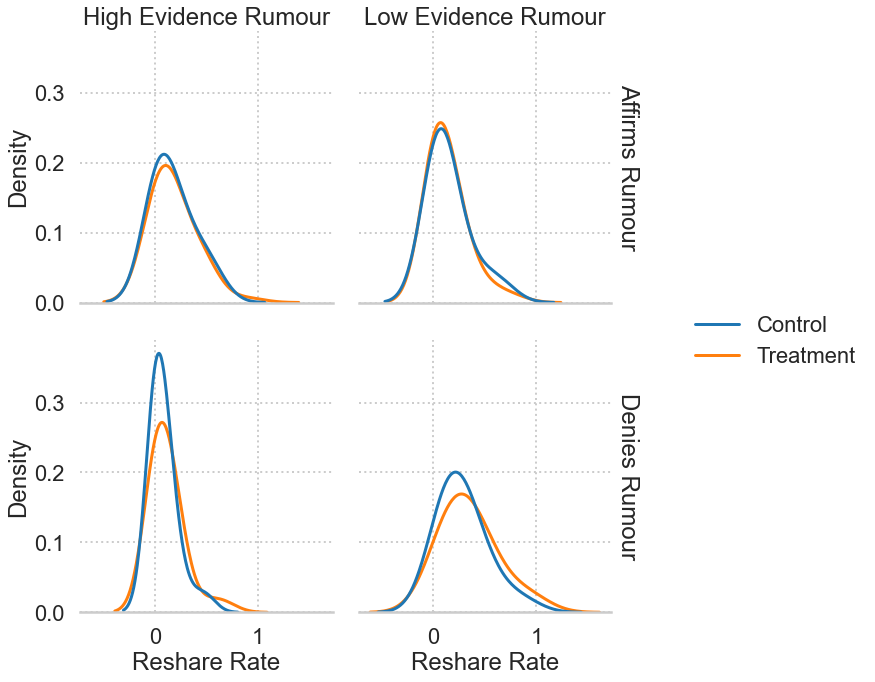

In [14]:
g = sns.displot(data=af_di, 
            x="reshared",
            hue="condition",
            col="evidence",
            row="code",
            bw_adjust=1.8,
            facet_kws={"margin_titles":True},
            kind="kde")
g.set_titles(col_template="{col_name} Evidence Rumour", row_template="{row_name} Rumour")
g.set_axis_labels(x_var="Reshare Rate")
g._legend.set_title("")
sns.despine(left=True)
g.fig.savefig("../figures/descriptive_analysis/reshare_rate-hist.pdf")

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


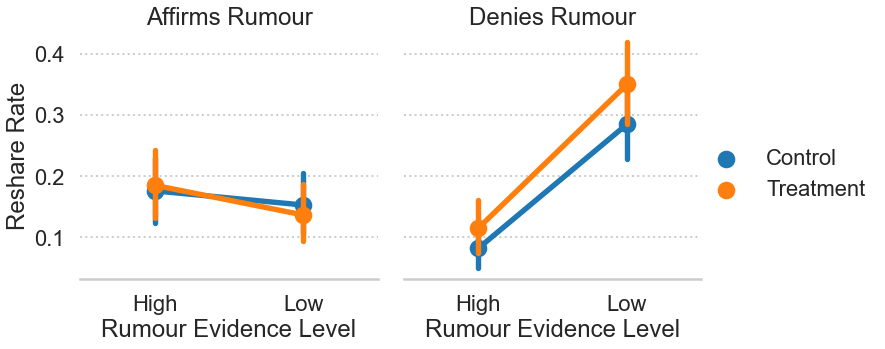

In [15]:
g = sns.catplot(data=af_di, 
            x="evidence",
            y="reshared",
            hue="condition",
            col="code",
            col_wrap=2,
            margin_titles=True,
            kind="point")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Reshare Rate",x_var="Rumour Evidence Level")
g._legend.set_title("")
sns.despine(left=True)
g.savefig("../figures/descriptive_analysis/reshare_rate-point_plot.pdf")

**For seeing how to describe this plot. Look at Pennycook's Nature article.**

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


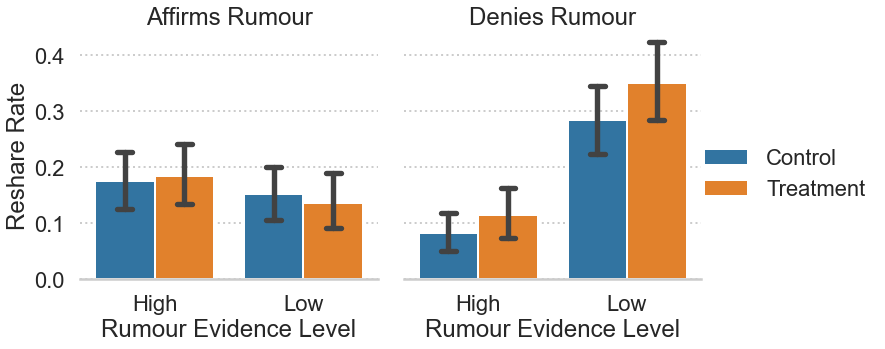

In [16]:
g = sns.catplot(data=af_di, 
            x="evidence",
            y="reshared",
            hue="condition",
            col="code",
            col_wrap=2,
            capsize=.1,
            margin_titles=True,
            kind="bar")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Reshare Rate",x_var="Rumour Evidence Level")
g._legend.set_title("")
sns.despine(left=True)
g.savefig("../figures/descriptive_analysis/reshare_rate-bar_plot.pdf")

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


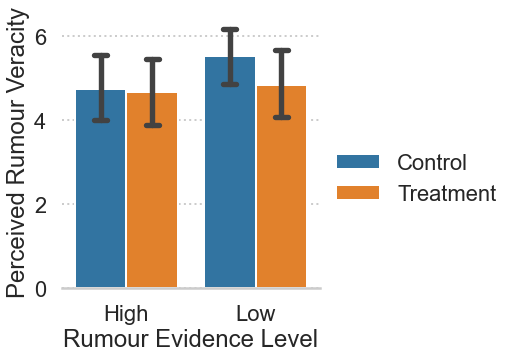

In [20]:
reshare_rates = reshare_rates.sort_values(by=['condition','evidence'],key=lambda x: x.map(sorting_dict))
g = sns.catplot(data=reshare_rates, 
            x="evidence",
            y="veracityEstimate",
            hue="condition",
            capsize=.1,
            margin_titles=True,
            kind="bar")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Perceived Rumour Veracity",x_var="Rumour Evidence Level")
g._legend.set_title("")
sns.despine(left=True)
g.savefig("../figures/descriptive_analysis/PRV-bar_plot.pdf")

## Relationship between accuracy and sharing behaviour

Fig. Scatterplot (with best-fitting regression line) showing the association between perceived rumour veracity and $p^a_R$. A perceived veracity value of 1 indicates the participant's belief that the rumour is entirely false, and a value of 10 indicates the participant's belief that the rumour is 100% true. The error band on the regression represents the 95% confidence interval. For clarity, each scatter point represents the mean affirmation rate for that discrete value along the x-axis, with a 95% confidence interval.

/Users/cameron/.local/share/virtualenvs/analysis-qCqSuDGf/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


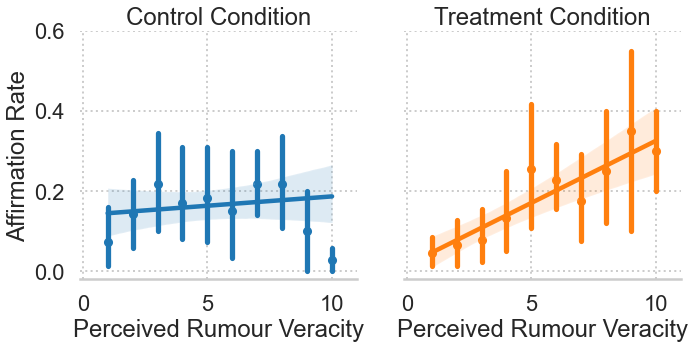

In [21]:
markers = {"High": "o", "Low": "x"}
g = sns.lmplot(x="veracityEstimate", 
               y="Affirms",
               hue="condition",
               col="condition",
               x_estimator=np.mean,
               n_boot=5000,
               data=reshare_rates)
g.set_titles(col_template="{col_name} Condition",)
g.set(xlim=(-0.1,11),ylim=(-0.02,0.60))
g.set_axis_labels(y_var="Affirmation Rate",x_var="Perceived Rumour Veracity")
sns.despine(left=True)
g.savefig("../figures/descriptive_analysis/affirmation_vs_estimate.pdf")

**DISREGARD FROM HERE ON OUT**

*old statistical analyses that need to be refactored and moved to the system analysis script*

### $H_1$

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Add a random effect for the participant ID since there are repeated measures

md = smf.ols(f"Affirms ~ C(condition)*C(evidence)",#" + (1 | user_id) + age + C(educationLevel) + {affil_columns} + {sm_cols} + {gender_cols} + (1|PROLIFIC_ID)",
             reshare_rates).fit()
md.summary()

In [ ]:
table = sm.stats.anova_lm(md, typ=2) # Type 2 Anova DataFrame
table

In [ ]:
md2 = smf.mixedlm(f"Affirms ~ C(condition)*C(evidence)",#"+ age + C(educationLevel) + {affil_columns} + {sm_cols} + {gender_cols} + (1|PROLIFIC_ID)",
                     reshare_rates,
                     groups=reshare_rates["user_id"]).fit()
md2.summary()